# Thesis
# **Comparative Analysis of Machine Learning Algorithms <br> for Predictive Maintenance in the Manufacturing Industry** <br>
## ©  Roland Zsolt Nagy, 2024


### Heading titles and numbering in this Notebook are corresponding to the section titles and numbering in the thesis.

### Imports

In [1]:
# Import the necessary libraries, functions, and models 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis
from matplotlib.colors import ListedColormap

# Set white grid background for plots
sns.set_style('whitegrid')

# Show plots right away in the notebook
%matplotlib notebook
%matplotlib inline

e:\Programok\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
e:\Programok\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 3.2. Statistical overview of the data

In [2]:
df = pd.read_csv('Altered_machine_process.csv')

In [3]:
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,224.000000,225.000000,225.000000,226.000000
mean,1.977679,1759.200000,1.644444,0.068117
std,1.545844,887.559998,43.726604,0.155441
min,-15.000000,20.000000,-200.000000,-0.262149
25%,1.000000,1000.000000,-30.000000,0.022769
50%,2.000000,2000.000000,10.000000,0.048631
75%,3.000000,2500.000000,40.000000,0.073982
max,10.000000,3000.000000,150.000000,0.800000


### 4.1. Visual data exploration and data cleaning

#### Axis feature

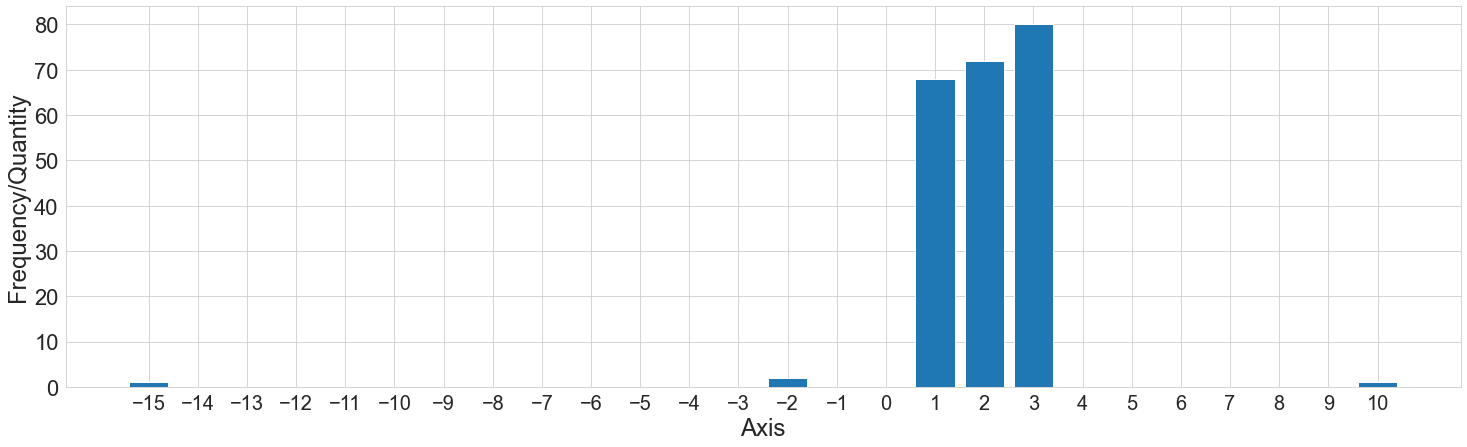

In [4]:
plt.figure(figsize=(25,7))
plt.bar(df.Axis.value_counts().index, df.Axis.value_counts())

plt.xlabel('Axis', fontsize = 24)
plt.ylabel('Frequency/Quantity', fontsize = 24)

plt.xticks(np.arange(df.Axis.min(), df.Axis.max()+1, 1), fontsize = "20")
plt.yticks(fontsize = "22")

plt.show()

In [5]:
sorted(df.Axis.unique())

[-15.0, -2.0, 1.0, 2.0, 3.0, 10.0, nan]

In [6]:
# Check number of observations
no_obs_all = len(df)
print(no_obs_all)

# Remove outliers
df = df.loc[(df.Axis >= 1) & (df.Axis <= 3)]

# Check number of observations after removing outliers
no_obs_wo_outliers = len(df)
print(no_obs_wo_outliers)

# Check how many observations were removed in case of Axis and their ratio
print(no_obs_all - no_obs_wo_outliers)
(no_obs_all - no_obs_wo_outliers)/no_obs_all*100

226
220
6


2.6548672566371683

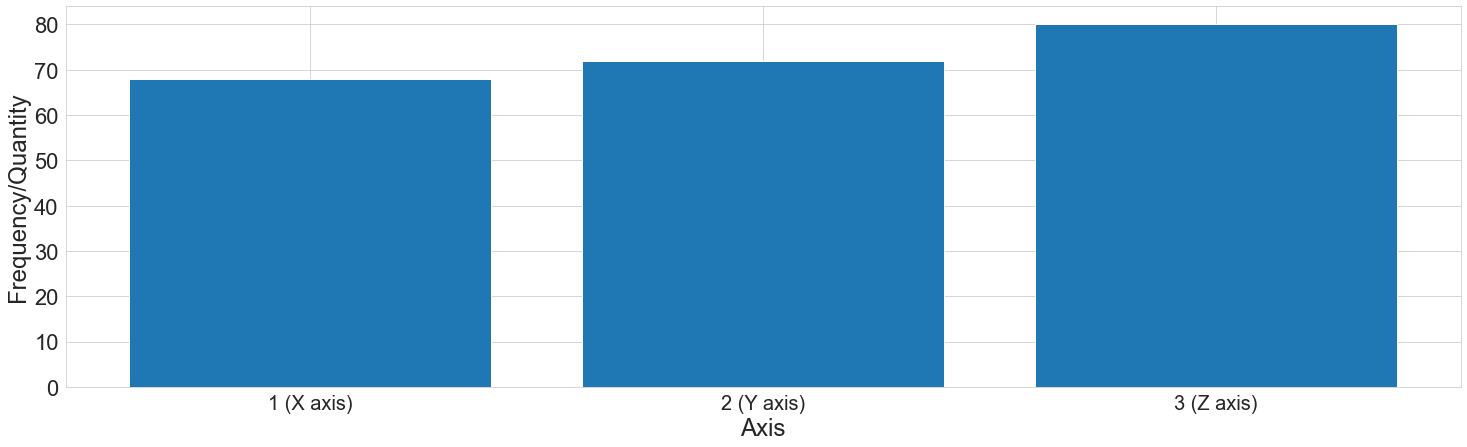

In [7]:
plt.figure(figsize=(25,7))
plt.bar(df.Axis.value_counts().index, df.Axis.value_counts())

plt.xlabel('Axis', fontsize = 24)
plt.ylabel('Frequency/Quantity', fontsize = 24)

plt.xticks(np.arange(df.Axis.min(), df.Axis.max()+1, 1), labels=["1 (X axis)", "2 (Y axis)", "3 (Z axis)"], fontsize = "20")
plt.yticks(fontsize = "22")

plt.show()

#### Feed feature

Text(0, 0.5, 'Frequency/Quantity')

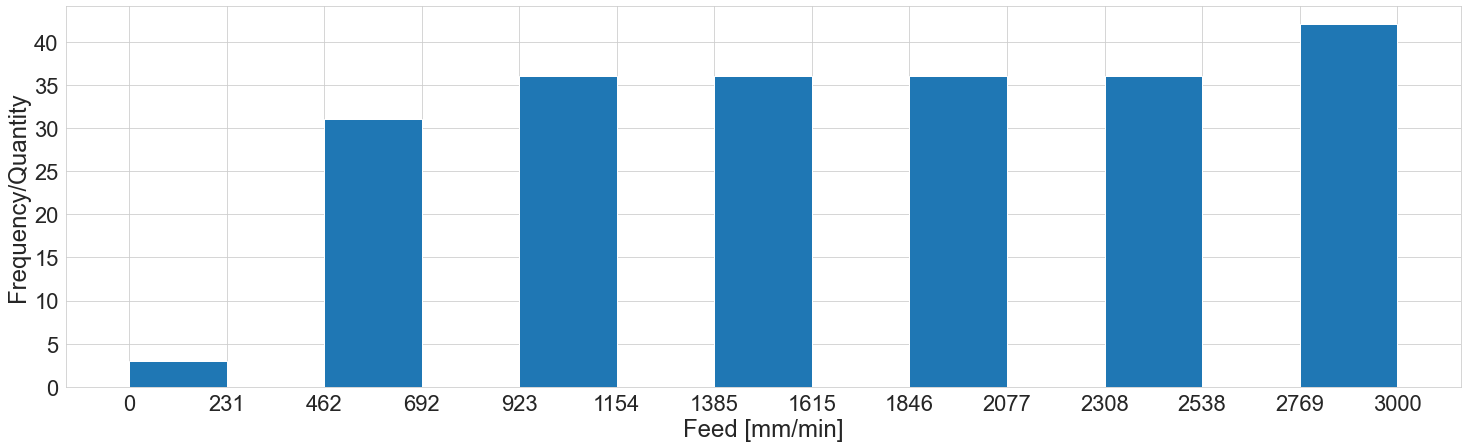

In [8]:
%matplotlib inline
plt.figure(figsize=(25,7))

plt.hist(df.Feed, bins = 13, range = (0, df.Feed.max()))

plt.xticks(np.linspace(0, df.Feed.max(), 14), fontsize = "22")
plt.yticks(fontsize = "22")

plt.xlabel('Feed [mm/min]', fontsize = 24)
plt.ylabel('Frequency/Quantity', fontsize = 24)

In [9]:
sorted(df.Feed.unique())

[20.0, 50.0, 150.0, 500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0]

In [10]:
# Check number of observations
no_obs_all = len(df)
print(no_obs_all)

# Removing outliers
df = df.loc[(df.Feed >= 500) & (df.Feed <= 3000)]

# Check number of observations after removing outliers
no_obs_wo_outliers = len(df)
print(no_obs_wo_outliers)

# Check how many observations were removed in case of Feed and their ratio
print(no_obs_all - no_obs_wo_outliers)
(no_obs_all - no_obs_wo_outliers)/no_obs_all*100

220
217
3


1.3636363636363635

Text(0, 0.5, 'Frequency/Quantity')

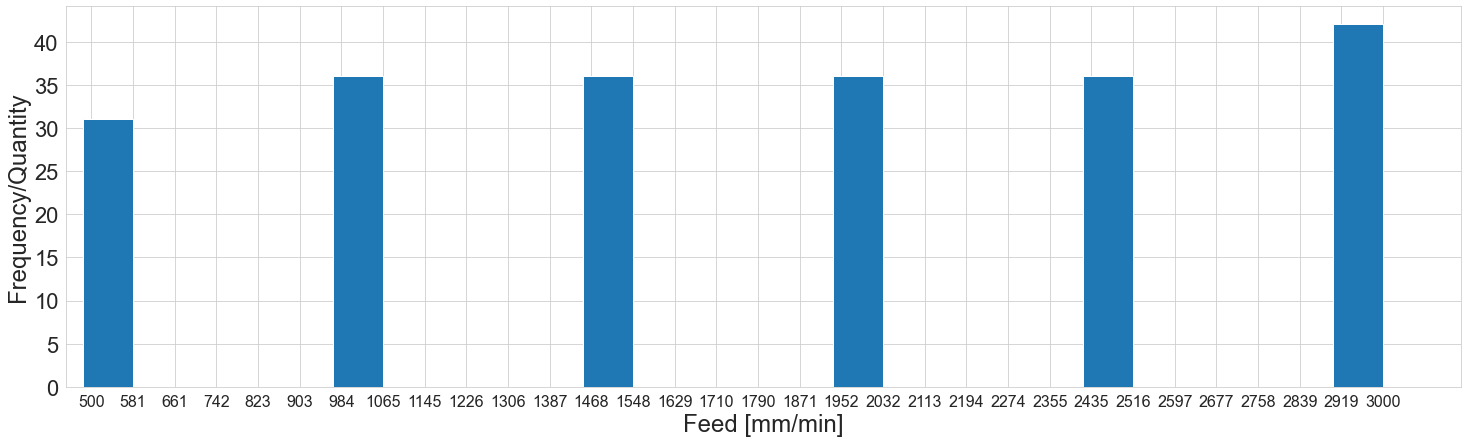

In [11]:
%matplotlib inline
plt.figure(figsize=(25,7))

plt.hist(df.Feed, bins = 31, range = (0, df.Feed.max()))

plt.xticks(np.linspace(df.Feed.min(), df.Feed.max(), 32), fontsize = "16")
plt.yticks(fontsize = "22")

plt.xlim(left = 450)
plt.xlabel('Feed [mm/min]', fontsize = 24)
plt.ylabel('Frequency/Quantity', fontsize = 24)

#### Path feature

Text(0, 0.5, 'Frequency/Quantity')

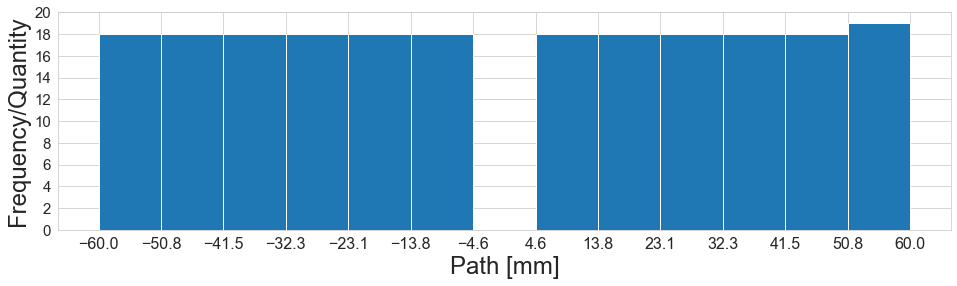

In [12]:
%matplotlib inline
plt.figure(figsize=(16,4))
plt.hist(df.Path, bins = 13, range = (df.Path.min(), df.Path.max()))
plt.xticks(np.linspace(df.Path.min(), df.Path.max(), 14), fontsize = 16)
plt.yticks(np.arange(0, 21, 2), fontsize = 15)

plt.xlabel('Path [mm]',  fontsize = 24)
plt.ylabel('Frequency/Quantity', fontsize = 24)

In [13]:
sorted(df.Path.unique())

[-60.0, -50.0, -40.0, -30.0, -20.0, -10.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]

In [14]:
# Check missing values in Path (after removing invalied values for Axis and Feed)

df.Path.isnull().sum()

0

#### Energy requirement target variable

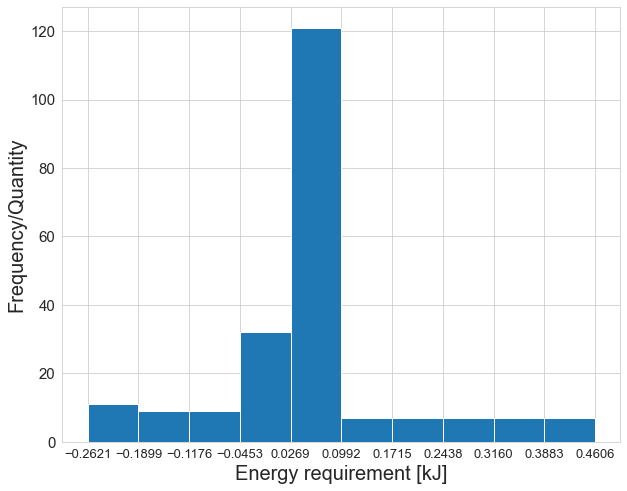

In [15]:
plt.figure(figsize=(10,8))

plt.hist(df.Energy_Requirement, bins=10, range = (df.Energy_Requirement.min(), df.Energy_Requirement.max()))
plt.xlabel('Energy requirement [kJ]', fontsize = 20)
plt.ylabel('Frequency/Quantity', fontsize = 20)
plt.xticks(np.linspace(df.Energy_Requirement.min(), df.Energy_Requirement.max(), 11), fontsize = 13)
plt.yticks(fontsize = 15)
plt.show()


In [16]:
# Calculate kurtosis

kurt_pearson = kurtosis(df.Energy_Requirement, fisher=False)
print(kurt_pearson)

4.707577141773302


In [17]:
sorted(df.Energy_Requirement.unique())

[-0.2621495,
 -0.2601395,
 -0.2547485,
 -0.2389,
 -0.23537,
 -0.21744,
 -0.2143295,
 -0.2107385,
 -0.206549,
 -0.202659,
 -0.1975,
 -0.17443,
 -0.1711295,
 -0.167479,
 -0.1662555,
 -0.16379,
 -0.1573,
 -0.12859,
 -0.12347,
 -0.1200795,
 -0.117088,
 -0.116037,
 -0.1152,
 -0.08339,
 -0.081509,
 -0.079749,
 -0.077788,
 -0.0746,
 -0.0743095,
 -0.0367195,
 -0.03562,
 -0.034748,
 -0.0341175,
 -0.033839,
 -0.0323765,
 0.017866,
 0.0188745,
 0.019724,
 0.019795,
 0.020401,
 0.020536,
 0.021158,
 0.021468,
 0.022007,
 0.022676,
 0.022769,
 0.0231495,
 0.0253675,
 0.02725,
 0.0288385,
 0.029462,
 0.0304345,
 0.0305605,
 0.031511,
 0.0319525,
 0.033226,
 0.0335525,
 0.0340955,
 0.0344795,
 0.036086,
 0.036161,
 0.0387305,
 0.039309,
 0.040597,
 0.0409825,
 0.0416145,
 0.0427465,
 0.0429285,
 0.044957,
 0.0452675,
 0.0459925,
 0.046528,
 0.04857,
 0.0486305,
 0.049511,
 0.049817,
 0.0510815,
 0.051358,
 0.0535555,
 0.054118,
 0.0545975,
 0.055712,
 0.0573345,
 0.05831,
 0.0583385,
 0.0585675,
 0.0

In [18]:
df.Energy_Requirement.value_counts().max()

2

In [19]:
# Check missing values in the whole dataframe

df.isnull().sum()

Axis                  0
Feed                  0
Path                  0
Energy_Requirement    0
dtype: int64

In [20]:
len(df)

217

### 4.2. Target separation, train-test split, and feature scaling

#### Feature-target separation

In [21]:
X_multi = df.drop(labels = 'Energy_Requirement', axis = 1)
# labels: Index or column labels to drop
# axis : {0 or 'index', 1 or 'columns'}, default 0. Whether to drop labels from the index (0 or 'index') or columns (1 or 'columns').

# Separate the energy requirement or consumption the target variable
y_target = df.Energy_Requirement

#### Dividing dataset into training and test sets 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_target, test_size = 0.3, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)

(151, 3)
(66, 3)


#### Scaling of the features

In [24]:
# Create StandardScaler object
scaler = StandardScaler()

# Save the original training set to check feature scales later for SVR
X_train_orig = X_train

# Fit and transform train data
X_train = scaler.fit_transform(X_train)

# Transform test data
X_test = scaler.transform(X_test)

# Check how well the test set represents the training set
display(pd.DataFrame(X_train, columns = X_multi.columns.values.tolist()).describe().loc[["count", "mean", "std", "min", "max"]])
display(pd.DataFrame(X_test, columns = X_multi.columns.values.tolist()).describe().loc[["count", "mean", "std", "min", "max"]])

,Axis,Feed,Path
count,1.510000e+02,1.510000e+02,1.510000e+02
mean,-1.176395e-17,-5.881976e-17,-3.088038e-17
std,1.003328e+00,1.003328e+00,1.003328e+00
min,-1.281465e+00,-1.537218e+00,-1.571815e+00
max,1.167917e+00,1.393589e+00,1.401179e+00


,Axis,Feed,Path
count,66.000000,66.000000,66.000000
mean,0.017450,0.008117,-0.257992
std,1.004839,1.010755,0.870216
min,-1.281465,-1.537218,-1.571815
max,1.167917,1.393589,1.401179


### 5.1. The process of training and making predictions

#### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
linreg_model = LinearRegression()

In [27]:
linreg_model.fit(X_train, y_train)

LinearRegression()

In [28]:
linreg_pred_train = linreg_model.predict(X_train)

In [29]:
linreg_pred_test = linreg_model.predict(X_test)

#### Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf_model = RandomForestRegressor(random_state = 42)

In [32]:
# # Hyperparameter tuning - not in the scope of this study, but results with tuned hyperparameters are mentioned as a comment in section 9. Summary and conclusion

# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid_rf = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }

# # Setup the grid search
# grid_search_rf  = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=10, n_jobs=-1, verbose=2)

# # Fit the grid search
# grid_search_rf.fit(X_train, y_train)

# # Best parameters
# best_params_rf = grid_search_rf.best_params_
# print("Best parameters for RandomForestRegressor: ", best_params_rf)

# rf_model = grid_search_rf.best_estimator_


In [33]:
# # Hyperparameter tuning - not in the scope of this study, but results with tuned hyperparameters are mentioned as a comment in section 9. Summary and conclusion

# import optuna
# from sklearn.model_selection import cross_val_score

# # Objective function to minimize
# def objective_rf(trial):
#     n_estimators = trial.suggest_int('n_estimators', 50, 200)
#     max_depth = trial.suggest_int('max_depth', 10, 30)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
#     rf = RandomForestRegressor(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split
#     )
    
#     return -cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring='neg_mean_squared_error').mean()

# # Create a study and optimize it
# study_rf = optuna.create_study(direction='minimize')
# study_rf.optimize(objective_rf, n_trials=100)

# # Best parameters
# best_params_rf_optuna = study_rf.best_params
# print("Best parameters for RandomForestRegressor (Optuna): ", best_params_rf_optuna)

# # Train the model with best parameters
# rf_model = RandomForestRegressor(**best_params_rf_optuna)

In [34]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
rf_pred_train = rf_model.predict(X_train)

In [36]:
rf_pred_test = rf_model.predict(X_test)

#### Support Vector Regression

In [37]:
# Due to extrapolation limitations of SVR, check if the range of feature values present in the training set (before scaling - "orig")
# is representative of the actual range of feature values  
display(X_train_orig.describe().loc[["count", "min", "max"]], X_multi.describe().loc[["count", "min", "max"]])

,Axis,Feed,Path
count,151.0,151.0,151.0
min,1.0,500.0,-60.0
max,3.0,3000.0,60.0


,Axis,Feed,Path
count,217.0,217.0,217.0
min,1.0,500.0,-60.0
max,3.0,3000.0,60.0


In [38]:
from sklearn.svm import SVR

In [39]:
SVRmodel = SVR()

In [40]:
# # Hyperparameter tuning - not in the scope of this study, but results with tuned hyperparameters are mentioned as a comment in section 9. Summary and conclusion
# from sklearn.model_selection import GridSearchCV


# # Define the parameter grid
# param_grid_svr = {
#     'C': [0.01, 0.1, 1, 2, 5],
#     'kernel': ["linear", "poly", "rbf", "sigmoid"],
#     'degree': [3, 4, 5, 8],
#     'gamma': ['scale', 'auto']
# }

# # Setup the grid search
# grid_search_svr = GridSearchCV(estimator=SVRmodel, param_grid=param_grid_svr, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# # Fit the grid search
# grid_search_svr.fit(X_train, y_train)

# # Best parameters
# best_params_svr = grid_search_svr.best_params_
# print("Best parameters for SVR: ", best_params_svr)


# SVRmodel = grid_search_svr.best_estimator_

In [41]:
# # Hyperparameter tuning - not in the scope of this study, but results with tuned hyperparameters are mentioned as a comment in section 9. Summary and conclusion

# import optuna
# from sklearn.model_selection import cross_val_score

# # Objective function to minimize
# def objective_svr(trial):
#     C = trial.suggest_float('C', 0.01, 10)
#     kernel = trial.suggest_categorical('kernel', ["linear", "poly", "rbf", "sigmoid"])
#     gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
#     degree = trial.suggest_int('degree', 3, 8)
    
#     svr = SVR(
#         C=C,
#         kernel=kernel,
#         gamma=gamma,
#         degree=degree
#     )
    
#     return -cross_val_score(svr, X_train, y_train, cv=5, n_jobs=-1, scoring='neg_mean_squared_error').mean()

# # Create a study and optimize it
# study_svr = optuna.create_study(direction='minimize')
# study_svr.optimize(objective_svr, n_trials=100)

# # Best parameters
# best_params_svr_optuna = study_svr.best_params
# print("Best parameters for SVR (Optuna): ", best_params_svr_optuna)

# SVRmodel = SVR(**best_params_svr_optuna)

In [42]:
SVRmodel.fit(X_train, y_train)

SVR()

In [43]:
svr_pred_train = SVRmodel.predict(X_train)

In [44]:
svr_pred_test = SVRmodel.predict(X_test)

### 6.1. Linear Regression (Residual plot)

In [45]:
print(linreg_pred_train.min(), linreg_pred_train.max())
print(linreg_pred_test.min(), linreg_pred_test.max())

-0.08605340404115341 0.21293164515512983
-0.08034328181477307 0.20151140070236917


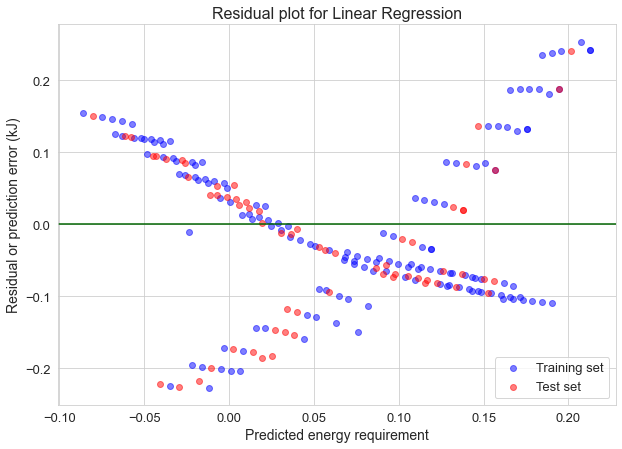

In [46]:
%matplotlib inline 
plt.figure(figsize=(10,7))

plt.scatter(linreg_pred_train, (y_train-linreg_pred_train), color='blue', alpha=0.5, label = "Training set")
plt.scatter(linreg_pred_test, (y_test-linreg_pred_test), color='r', alpha=0.5, label = "Test set")

plt.axhline(y=0, color = 'darkgreen')
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend(loc='lower right', fontsize = 13)
plt.title('Residual plot for Linear Regression', fontsize = 16)
plt.xlabel("Predicted energy requirement", fontsize = 14)
plt.ylabel("Residual or prediction error (kJ)", fontsize = 14)
plt.show()

### 6.2. Random Forest Regression (Residual plot)

In [47]:
print(rf_pred_train.min(), rf_pred_train.max())
print(rf_pred_test.min(), rf_pred_test.max())

-0.21975909000000024 0.45682450999999946
-0.21046714000000008 0.44352837999999933


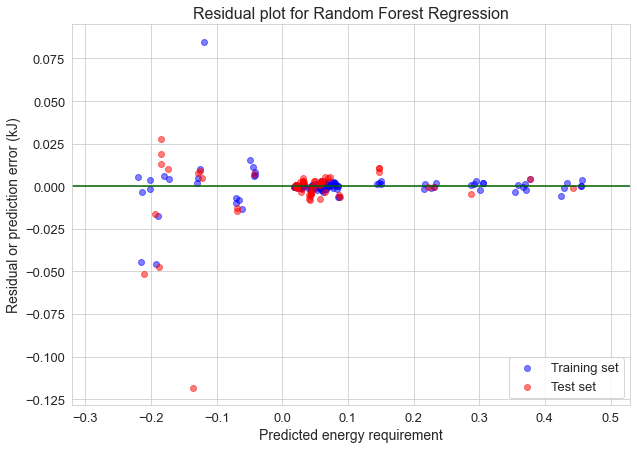

In [48]:
%matplotlib inline 
plt.figure(figsize=(10,7))

plt.scatter(rf_pred_train, (y_train-rf_pred_train), color='blue', alpha=0.5, label = "Training set")
plt.scatter(rf_pred_test, (y_test-rf_pred_test), color='r', alpha=0.5, label = "Test set")

plt.axhline(y=0, color = 'darkgreen')
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend(loc='lower right', fontsize = 13)
plt.xlim(-0.32, 0.53)
plt.xticks(np.arange(-0.3, 0.51, 0.1))
plt.title('Residual plot for Random Forest Regression', fontsize = 16)
plt.xlabel("Predicted energy requirement", fontsize = 14)
plt.ylabel("Residual or prediction error (kJ)", fontsize = 14)
plt.show()

### 6.3. Support Vector Regression (Residual plot)

In [49]:
print(svr_pred_train.min(), svr_pred_train.max())
print(svr_pred_test.min(), svr_pred_test.max())

-0.1599550345195222 0.36109000735659247
-0.1492389184649398 0.34620211759513064


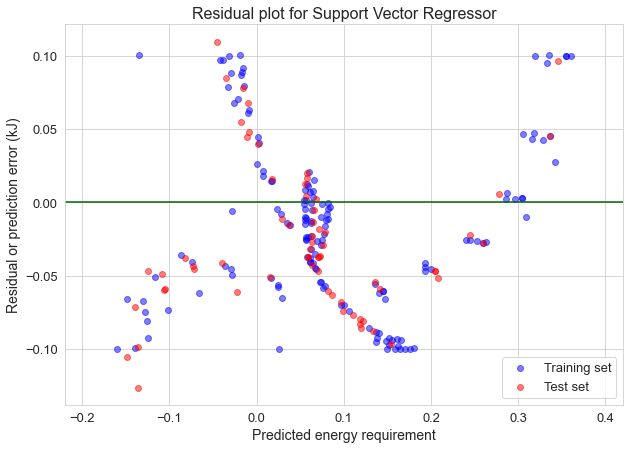

In [50]:
%matplotlib inline 
plt.figure(figsize=(10,7))

plt.scatter(svr_pred_train, (y_train-svr_pred_train), color='blue', alpha=0.5, label = "Training set")
plt.scatter(svr_pred_test, (y_test-svr_pred_test), color='r', alpha=0.5, label = "Test set")

plt.axhline(y=0, color = 'darkgreen')
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend(loc='lower right', fontsize = 13)
plt.title('Residual plot for Support Vector Regressor', fontsize = 16)
plt.xlabel("Predicted energy requirement", fontsize = 14)
plt.ylabel("Residual or prediction error (kJ)", fontsize = 14)
plt.xlim(-0.22, 0.42)
plt.show()

### 6.4. Residuals side-by-side and in the same plot

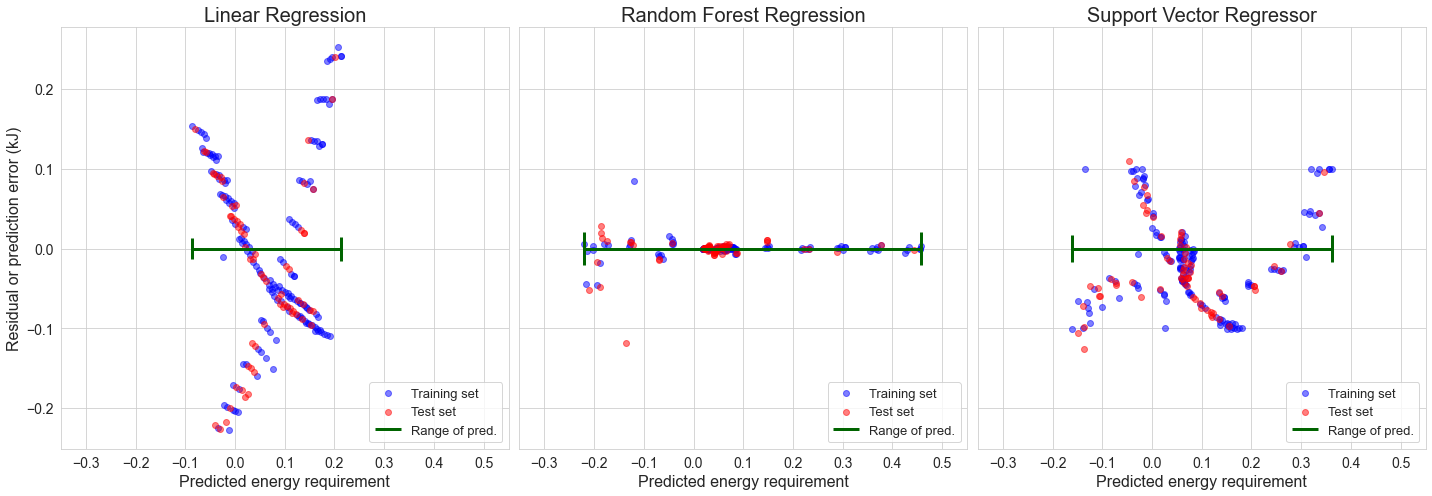

In [51]:
# Residuals plots side-by-side

fig, axs = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

# Linear Regression residual plot
axs[0].scatter(linreg_pred_train, (y_train-linreg_pred_train), color='blue', alpha=0.5, label="Training set")
axs[0].scatter(linreg_pred_test, (y_test-linreg_pred_test), color='r', alpha=0.5, label="Test set")
axs[0].hlines(y=0, 
               xmin = min(min(linreg_pred_train), min(linreg_pred_test)), 
               xmax = max(max(linreg_pred_train), max(linreg_pred_test)),
               color='darkgreen',
               linewidth = 3,
               zorder = 1)
axs[0].vlines(x=min(min(linreg_pred_train), min(linreg_pred_test)), 
               ymin = 0.013, 
               ymax = -0.013,
               color='darkgreen',
               linewidth = 3,
               zorder = 5)
axs[0].vlines(x=max(max(linreg_pred_train), max(linreg_pred_test)), 
               ymin = 0.015, 
               ymax = -0.015,
               color='darkgreen',
               linewidth = 3,
               zorder = 5,
               label = "Range of pred.")
axs[0].set_xlim(-0.35, 0.55)
axs[0].legend(loc='lower right', fontsize = 13)
axs[0].set_title('Linear Regression', fontsize = 20)
axs[0].set_xlabel("Predicted energy requirement", fontsize = 16)
axs[0].set_ylabel("Residual or prediction error (kJ)", fontsize = 16)

axs[0].tick_params(axis='both', which='major', labelsize=14)


# Random Forest Regression residual plot
axs[1].scatter(rf_pred_train, (y_train-rf_pred_train), color='blue', alpha=0.5, label="Training set")
axs[1].scatter(rf_pred_test, (y_test-rf_pred_test), color='r', alpha=0.5, label="Test set")
axs[1].hlines(y=0, 
               xmin = min(min(rf_pred_train), min(rf_pred_test)), 
               xmax = max(max(rf_pred_train), max(rf_pred_test)),
               color='darkgreen',
               linewidth = 3,
               zorder = 1)
axs[1].vlines(x=min(min(rf_pred_train), min(rf_pred_test)), 
               ymin = 0.021, 
               ymax = -0.021,
               color='darkgreen',
               linewidth = 3,
               zorder = 2)
axs[1].vlines(x=max(max(rf_pred_train), max(rf_pred_test)), 
               ymin = 0.021, 
               ymax = -0.021,
               color='darkgreen',
               linewidth = 3,
               zorder = 5,
               label = "Range of pred.")
axs[1].set_xlim(-0.35, 0.55)
axs[1].legend(loc='lower right', fontsize = 13)
axs[1].set_title('Random Forest Regression', fontsize = 20)
axs[1].set_xlabel("Predicted energy requirement", fontsize = 16)
axs[1].tick_params(axis='both', which='major', labelsize=14)


# Support Vector Regressor residual plot
axs[2].scatter(svr_pred_train, (y_train-svr_pred_train), color='blue', alpha=0.5, label="Training set")
axs[2].scatter(svr_pred_test, (y_test-svr_pred_test), color='r', alpha=0.5, label="Test set")
axs[2].hlines(y=0, 
               xmin = min(min(svr_pred_train), min(svr_pred_test)), 
               xmax = max(max(svr_pred_train), max(svr_pred_test)),
               color='darkgreen',
               linewidth = 3,
               zorder = 1)
axs[2].vlines(x=min(min(svr_pred_train), min(svr_pred_test)), 
               ymin = 0.017, 
               ymax = -0.017,
               color='darkgreen',
               linewidth = 3,
               zorder = 5)
axs[2].vlines(x=max(max(svr_pred_train), max(svr_pred_test)), 
               ymin = 0.017, 
               ymax = -0.017,
               color='darkgreen',
               linewidth = 3,
               zorder = 5,
               label = "Range of pred.")
axs[2].set_xlim(-0.35, 0.55)
axs[2].legend(loc='lower right', fontsize = 13)
axs[2].set_title('Support Vector Regressor', fontsize = 20)
axs[2].set_xlabel("Predicted energy requirement", fontsize = 16)
axs[2].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

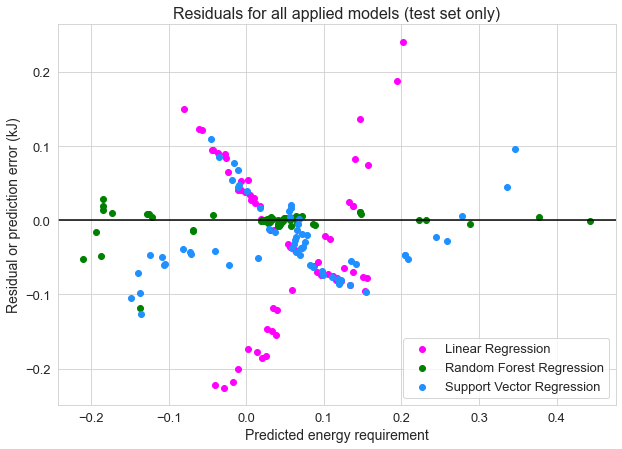

In [52]:
# Test set residuals of the utilised models in one plot

plt.figure(figsize=(10,7))

plt.scatter(linreg_pred_test, (y_test-linreg_pred_test), color='magenta', label = "Linear Regression")
plt.scatter(rf_pred_test, (y_test-rf_pred_test), color='green', label = "Random Forest Regression")
plt.scatter(svr_pred_test, (y_test-svr_pred_test), color='dodgerblue', label = "Support Vector Regression")

plt.axhline(y=0, color = "black")
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend(loc='lower right', fontsize = 13)
plt.title('Residuals for all applied models (test set only)', fontsize = 16)
plt.xlabel("Predicted energy requirement", fontsize = 14)
plt.ylabel("Residual or prediction error (kJ)", fontsize = 14)
plt.show()

### 7. Performance comparison: numerical examination

In [53]:
MSE_linreg = mean_squared_error(y_test, linreg_pred_test)
MAE_linreg = mean_absolute_error(y_test, linreg_pred_test)

MSE_rf = mean_squared_error(y_test, rf_pred_test) 
MAE_rf = mean_absolute_error(y_test, rf_pred_test) 

MSE_svr = mean_squared_error(y_test, svr_pred_test)
MAE_svr = mean_absolute_error(y_test, svr_pred_test) 

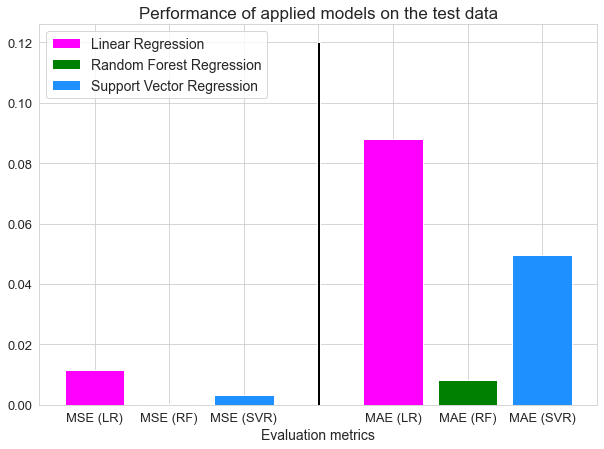

In [54]:
%matplotlib inline 
plt.figure(figsize=(10,7))

plt.bar(['MSE (LR)'], height = [MSE_linreg], color='magenta', label = 'Linear Regression')
plt.bar(['MSE (RF)'], [MSE_rf], color='green', label = 'Random Forest Regression')
plt.bar(['MSE (SVR)'], height = [MSE_svr], color='dodgerblue', label = 'Support Vector Regression')

plt.bar([''], height = [0.12], color='black', width = 0.04)


plt.bar(['MAE (LR)'],[MAE_linreg], color='magenta')
plt.bar(['MAE (RF)'],[MAE_rf], color='green')
plt.bar(['MAE (SVR)'],[MAE_svr], color='dodgerblue')

plt.tick_params(axis='both', which='major', labelsize=13)
plt.xlabel('Evaluation metrics', fontsize = 14)
plt.title('Performance of applied models on the test data', fontsize = 17)
plt.legend(loc='upper left', fontsize = 14)
plt.show()

In [55]:
print(MAE_svr)
print(MSE_svr)

0.049704900109078104
0.003280201660629847


In [56]:
print(MAE_rf)
print(MSE_rf)

0.00808655643939394
0.0003353257267453609


### 8.1. Energy consumption versus Axis

In [57]:
axes_colors = ListedColormap(['darkblue', 'darkgreen', 'darkred'])

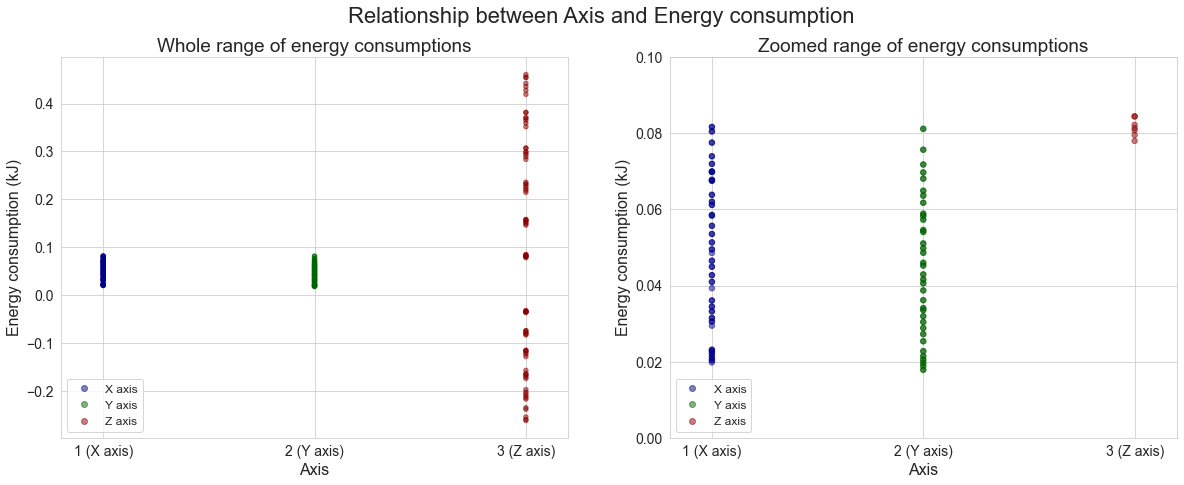

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

fig.suptitle('Relationship between Axis and Energy consumption', fontsize=22)

# Relationship between Feed and Energy consumption
scatter0 = axs[0].scatter(X_multi.Axis, y_target, c = X_multi.Axis, cmap=axes_colors, s = 20, alpha=0.5)
axs[0].legend(handles=scatter0.legend_elements()[0], labels=['X axis', 'Y axis', 'Z axis'], loc='lower left', fontsize = 12)
axs[0].set_title("Whole range of energy consumptions", fontsize = 19)
axs[0].set_xlabel("Axis", fontsize = 16)
axs[0].set_ylabel("Energy consumption (kJ)", fontsize = 16)
axs[0].tick_params(axis='both', which='major', labelsize=14)
axs[0].set_xticks(np.linspace(1.00,3.00,3), labels=["1 (X axis)", "2 (Y axis)", "3 (Z axis)"])
axs[0].set_xlim(plt.xlim(0.8, 3.2))

# Zooming in to energy consumptions between 0.0 and 0.1 kJ
scatter2 = axs[1].scatter(X_multi.Axis, y_target, c = X_multi.Axis, cmap=axes_colors, s = 30, alpha=0.5)
axs[1].legend(handles=scatter2.legend_elements()[0], labels=['X axis', 'Y axis', 'Z axis'], loc='lower left', fontsize = 12)
axs[1].set_title("Zoomed range of energy consumptions", fontsize = 19)
axs[1].set_xlabel("Axis", fontsize = 16)
axs[1].set_ylabel("Energy consumption (kJ)", fontsize = 16)
axs[1].tick_params(axis='both', which='major', labelsize=14)
axs[1].set_ylim(0.00, 0.1)
axs[1].set_xticks(np.linspace(1.00,3.00,3), labels=["1 (X axis)", "2 (Y axis)", "3 (Z axis)"])
axs[1].set_xlim(plt.xlim(0.8, 3.2))

plt.show()

### 8.2. Energy consumption versus Feed

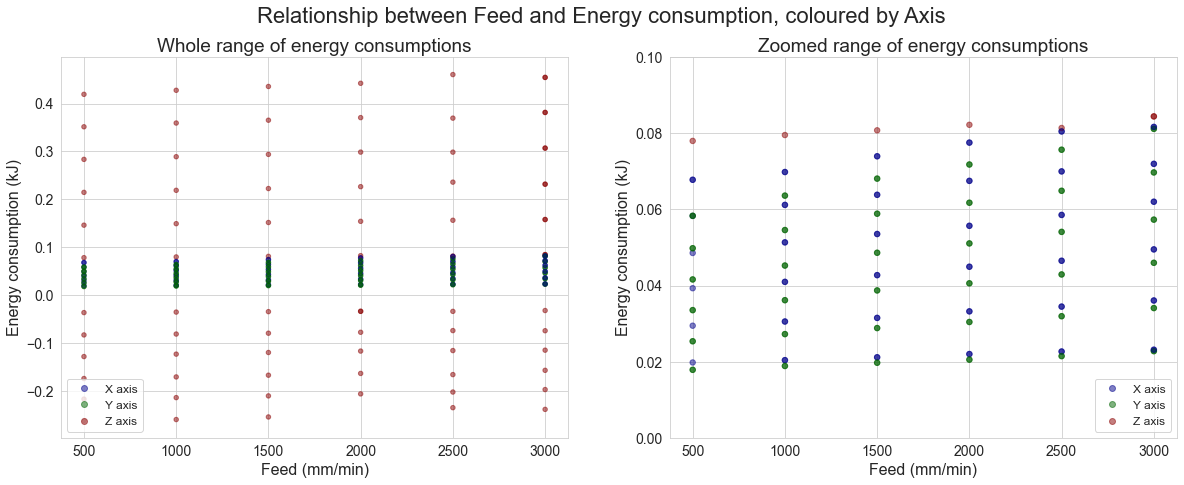

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

fig.suptitle('Relationship between Feed and Energy consumption, coloured by Axis', fontsize=22)

# Relationship between Feed and Energy consumption
scatter1 = axs[0].scatter(X_multi.Feed, y_target, c = X_multi.Axis, cmap=axes_colors, s = 20, alpha=0.5)
axs[0].legend(handles=scatter1.legend_elements()[0], labels=['X axis', 'Y axis', 'Z axis'], loc='lower left', fontsize = 12)
axs[0].set_title("Whole range of energy consumptions", fontsize = 19)
axs[0].set_xlabel("Feed (mm/min)", fontsize = 16)
axs[0].set_ylabel("Energy consumption (kJ)", fontsize = 16)
axs[0].tick_params(axis='both', which='major', labelsize=14)

# Zooming in to energy consumptions between 0.0 and 0.1 kJ
scatter2 = axs[1].scatter(X_multi.Feed, y_target, c = X_multi.Axis, cmap=axes_colors, s = 30, alpha=0.5)
axs[1].legend(handles=scatter2.legend_elements()[0], labels=['X axis', 'Y axis', 'Z axis'], loc='lower right', fontsize = 12)
axs[1].set_title("Zoomed range of energy consumptions", fontsize = 19)
axs[1].set_xlabel("Feed (mm/min)", fontsize = 16)
axs[1].set_ylabel("Energy consumption (kJ)", fontsize = 16)
axs[1].tick_params(axis='both', which='major', labelsize=14)
axs[1].set_ylim(0.00, 0.1)

plt.show()

### 8.3. Energy consumption versus Path

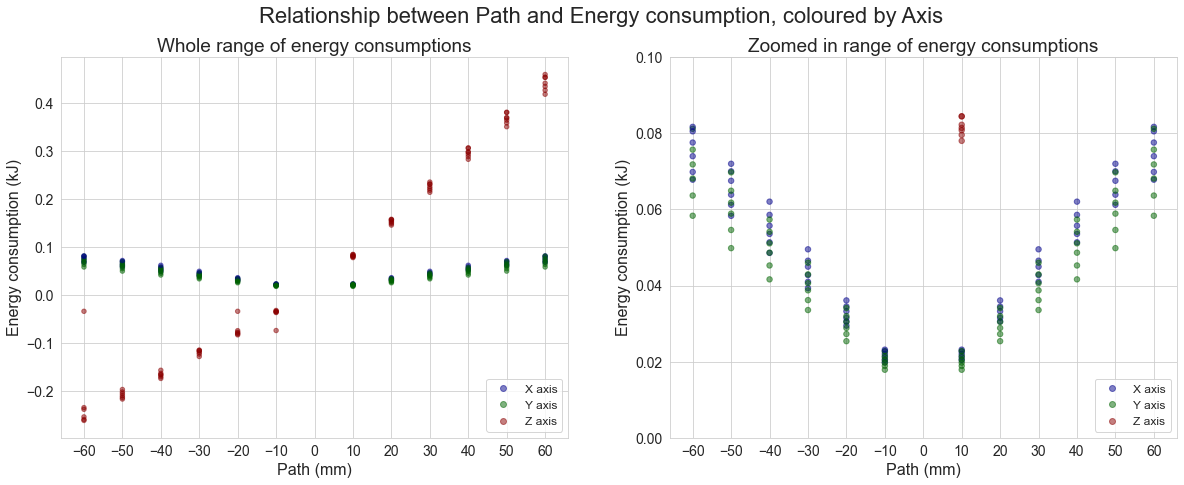

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

fig.suptitle('Relationship between Path and Energy consumption, coloured by Axis', fontsize=22)

# Relationship between Path and Energy consumption
scatter3 = axs[0].scatter(X_multi.Path, y_target, c = X_multi.Axis, cmap=axes_colors, s = 20, alpha=0.5)
axs[0].legend(handles=scatter1.legend_elements()[0], labels=['X axis', 'Y axis', 'Z axis'], loc='lower right', fontsize = 12)
axs[0].set_title("Whole range of energy consumptions", fontsize = 19)
axs[0].set_xlabel("Path (mm)", fontsize = 16)
axs[0].set_ylabel("Energy consumption (kJ)", fontsize = 16)
axs[0].tick_params(axis='both', which='major', labelsize=14)
axs[0].set_xticks(np.arange(-60, 61, 10))

# Zooming in to energy consumptions between 0.0 and 0.1 kJ
scatter4 = axs[1].scatter(X_multi.Path, y_target, c = X_multi.Axis, cmap=axes_colors, s = 30, alpha=0.5)
axs[1].legend(handles=scatter4.legend_elements()[0], labels=['X axis', 'Y axis', 'Z axis'], loc='lower right', fontsize = 12)
axs[1].set_title("Zoomed in range of energy consumptions", fontsize = 19)
axs[1].set_xlabel("Path (mm)", fontsize = 16)
axs[1].set_ylabel("Energy consumption (kJ)", fontsize = 16)
axs[1].tick_params(axis='both', which='major', labelsize=14)
axs[1].set_xticks(np.arange(-60, 61, 10))
axs[1].set_ylim(0.00, 0.1)

plt.show()